## Proyecto Data Science, Santiago Cecchini

---

## presentacion

### Objetivo Principal:

Reducir la dimensionalidad del dataset de comportamiento de compra para identificar las características más relevantes que influyen en el monto de compra.r makes purchases

### Preguntas de Interes:

*   ¿Los clientes que reciben descuentos tienden a gastar más en promedio?
*   ¿Son efectivos los descuentos a consumidores habituales?
*   ¿En que medida se corresponden con mayores ventas?


### Contexto Comercial

*Empresa:* Una tienda de comercio electrónico que vende una variedad de productos de ropa y accesorios.

*Problema Comercial:* La tienda desea optimizar sus estrategias de marketing y ventas enfocándose en las características clave que influyen en el comportamiento de compra de los clientes. Reducir la dimensionalidad del dataset permitirá un análisis más eficiente y una mejor comprensión de los factores determinantes de las compras.

### Contexto Analítico

**Dataset:** Información de compras de clientes, incluyendo características demográficas, detalles de los productos comprados, y datos sobre el proceso de compra.

*Variables:*

- Customer ID: Identificacion unica del cliente.
- Age: Edad del cliente.
- Gender: Genero del cliente.
- Item Purchased: Producto comprado.
- Category: Categoria del producto.
- Purchase Amount (USD): Monto de la compra en USD.
- Location: Ubicación del cliente.
- Size: Tamaño del producto.
- Color: Color del producto.
- Season: Temporada de la compra.
- Review Rating: Calificación de la reseña dada por el cliente.
- Subscription Status: Estado de suscripción (Sí/No).
- Promo Code Used: Código promocional usado (Sí/No).
- Previous Purchases: Número de compras anteriores.
- Payment Method: Método de pago.
- Frequency of Purchases: Frecuencia de las compras.
    
**Método de Selección de Características:** Se aplicó el método de Eliminación Recursiva de Características (RFE) con un modelo de regresión logística para identificar las características más relevantes.

## Desarrollo

### librerias a utilizar

In [13]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np


import matplotlib.pyplot       as plt
import seaborn                 as sns
import matplotlib              as mpl

#%matplotlib inline

In [14]:
# Configurando matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

In [ ]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [ ]:
# Configurando seaborn
sns.set_style(style="white")
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

In [ ]:
#sns.reset_orig()

In [15]:
file_path = 'C/Users/Hogar/Documents/ProyectoDS/shopping_behavior_updated.csv'

In [39]:
df = pd.read_csv('shopping_behavior_updated.csv')

In [40]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [42]:
df.shape

(3900, 18)

In [43]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.isnull().mean()

Customer ID               0.0
Age                       0.0
Gender                    0.0
Item Purchased            0.0
Category                  0.0
Purchase Amount (USD)     0.0
Location                  0.0
Size                      0.0
Color                     0.0
Season                    0.0
Review Rating             0.0
Subscription Status       0.0
Shipping Type             0.0
Discount Applied          0.0
Promo Code Used           0.0
Previous Purchases        0.0
Payment Method            0.0
Frequency of Purchases    0.0
dtype: float64

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Preprocessing
# Convert categorical variables to numerical
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 
                    'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 
                    'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Encode categorical columns
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Features and target variable
X = df.drop(columns=['Purchase Amount (USD)'])
y = df['Purchase Amount (USD)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the logistic regression model
rfe = RFE(model, n_features_to_select=10)

# Fit RFE
rfe.fit(X_scaled, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

selected_features


Index(['Customer ID', 'Gender', 'Item Purchased', 'Location', 'Color',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Promo Code Used', 'Payment Method'],
      dtype='object')

C:\Users\Hogar\AppData\Local\Temp\ipykernel_33996\197347961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Purchase Amount (USD)'] = y


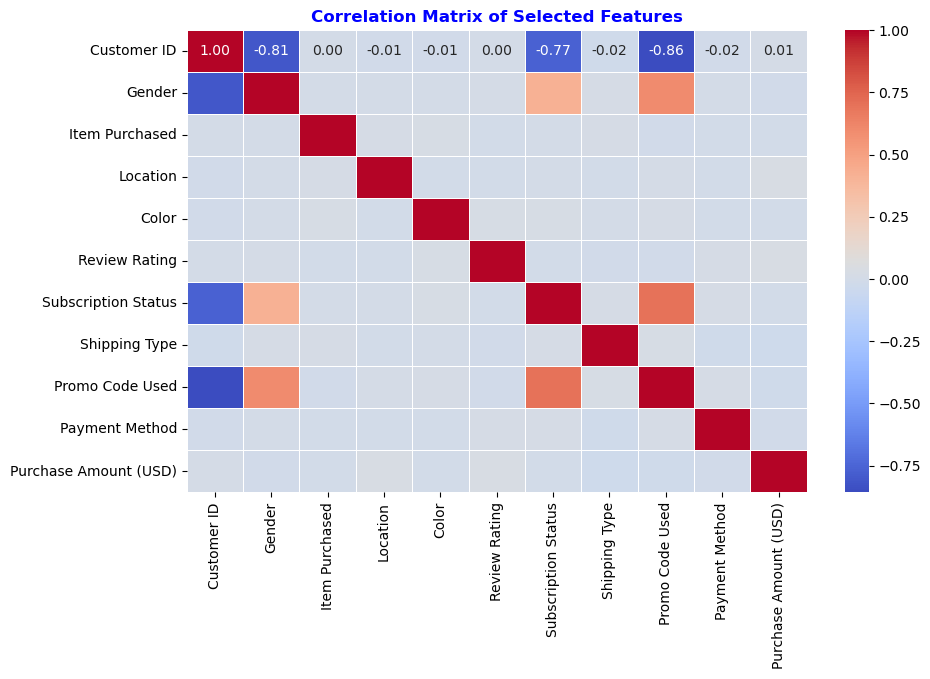

In [46]:
# Create a new dataframe with the selected features
selected_df = df[selected_features]

# Add the target variable back to the dataframe
selected_df['Purchase Amount (USD)'] = y

# Calculate the correlation matrix for the selected features
selected_correlation_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the correlation matrix
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Display the heatmap
plt.title('Correlation Matrix of Selected Features')
plt.show()
